### Bitcoin US Stock Price

In [ ]:
pip install alpha_vantage

In [120]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

In [121]:
time = TimeSeries(key= '8GNF4D86LLFN1RFZ', output_format= 'pandas')

In [122]:
data = time.get_daily(symbol= "BTC-USD",  outputsize='full')
data

(               1. open     2. high      3. low    4. close     5. volume
 date                                                                    
 2020-08-16  11864.3643  11927.9443  11828.0117  11899.3467  2.171187e+10
 2020-08-14  11768.6973  11963.2031  11768.6973  11865.6982  2.335492e+10
 2020-08-13  11772.6592  12150.9941  11685.4551  11768.8711  2.423796e+10
 2020-08-12  11588.4053  11796.3965  11216.8721  11784.1377  2.752220e+10
 2020-08-11  11404.5967  11748.3965  11249.6055  11584.9346  2.506455e+10
 ...                ...         ...         ...         ...           ...
 2014-09-20    408.0850    412.4260    393.1810    398.8210  2.658010e+07
 2014-09-19    394.6730    423.2960    389.8830    408.9040  3.686360e+07
 2014-09-18    424.1030    427.8350    384.5320    394.7960  3.791970e+07
 2014-09-17    456.8600    456.8600    413.1040    424.4400  3.448320e+07
 2014-09-16    465.8640    468.1740    452.4220    457.3340  2.105680e+07
 
 [2160 rows x 5 columns],
 {'1. Info

In [123]:
df = data[0]
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-08-16,11864.3643,11927.9443,11828.0117,11899.3467,2.171187e+10
2020-08-14,11768.6973,11963.2031,11768.6973,11865.6982,2.335492e+10
2020-08-13,11772.6592,12150.9941,11685.4551,11768.8711,2.423796e+10
2020-08-12,11588.4053,11796.3965,11216.8721,11784.1377,2.752220e+10
2020-08-11,11404.5967,11748.3965,11249.6055,11584.9346,2.506455e+10
...,...,...,...,...,...
2014-09-20,408.0850,412.4260,393.1810,398.8210,2.658010e+07
2014-09-19,394.6730,423.2960,389.8830,408.9040,3.686360e+07
2014-09-18,424.1030,427.8350,384.5320,394.7960,3.791970e+07


In [124]:
#column names
CLOSING_PRICE_COLUMN= '4. close'
MEAN_AVERAGE_3_DAYS='MA3'
MEAN_AVERAGE_7_DAYS='MA7'


**Weekly Average**

In [125]:
#drop unnecessary columns
df=df.drop(['1. open', '2. high', '3. low', '5. volume'], axis=1)

# sort values by date ascending
df=df.sort_values(by=['date'])

# group by monday week and take average
weekly_average=df[CLOSING_PRICE_COLUMN].resample('W-MON').mean()
print(weekly_average)

date
2014-09-22      417.462571
2014-09-29      396.902286
2014-10-06      347.691571
2014-10-13      373.094286
2014-10-20      387.342143
                  ...     
2020-07-20     9194.347643
2020-07-27    10018.472100
2020-08-03    11265.784033
2020-08-10    11692.384357
2020-08-17    11780.597660
Freq: W-MON, Name: 4. close, Length: 309, dtype: float64


In [136]:
df.columns

Index(['4. close', 'MA3', 'MA7', 'date'], dtype='object')

In [139]:
#rename closing column
CLOSING_PRICE_COLUMN='closing_price'
df.columns=[CLOSING_PRICE_COLUMN,'MA3', 'MA7', 'date']


**Rolling Average**

In [126]:
# make columns for averages
df[MEAN_AVERAGE_3_DAYS] = df[CLOSING_PRICE_COLUMN].rolling(window=3).mean()
df[MEAN_AVERAGE_7_DAYS] = df[CLOSING_PRICE_COLUMN].rolling(window=7).mean()
# make date index into a column
df['date']= df.index
df['date']=pd.to_datetime(df['date']).apply(lambda x: x.date()) 


In [127]:
df.head(10)

,4. close,MA3,MA7,date
date,,,,
2014-09-16,457.334,NaN,NaN,2014-09-16
2014-09-17,424.440,NaN,NaN,2014-09-17
2014-09-18,394.796,425.523333,NaN,2014-09-18
2014-09-19,408.904,409.380000,NaN,2014-09-19
2014-09-20,398.821,400.840333,NaN,2014-09-20
2014-09-21,402.152,403.292333,NaN,2014-09-21
2014-09-22,435.791,412.254667,417.462571,2014-09-22
2014-09-23,423.205,420.382667,412.587000,2014-09-23
2014-09-24,411.574,423.523333,410.749000,2014-09-24


**Plotting**

Overlapping line charts

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

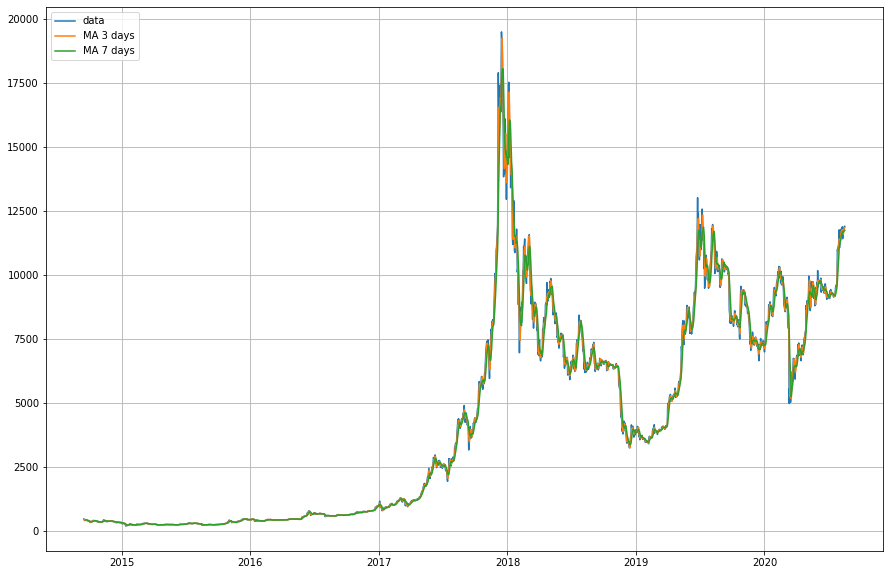

In [130]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df[CLOSING_PRICE_COLUMN],label='data')
plt.plot(df[MEAN_AVERAGE_3_DAYS],label='MA 3 days')
plt.plot(df[MEAN_AVERAGE_7_DAYS],label='MA 7 days')
plt.legend(loc=2)

Side by side bar charts

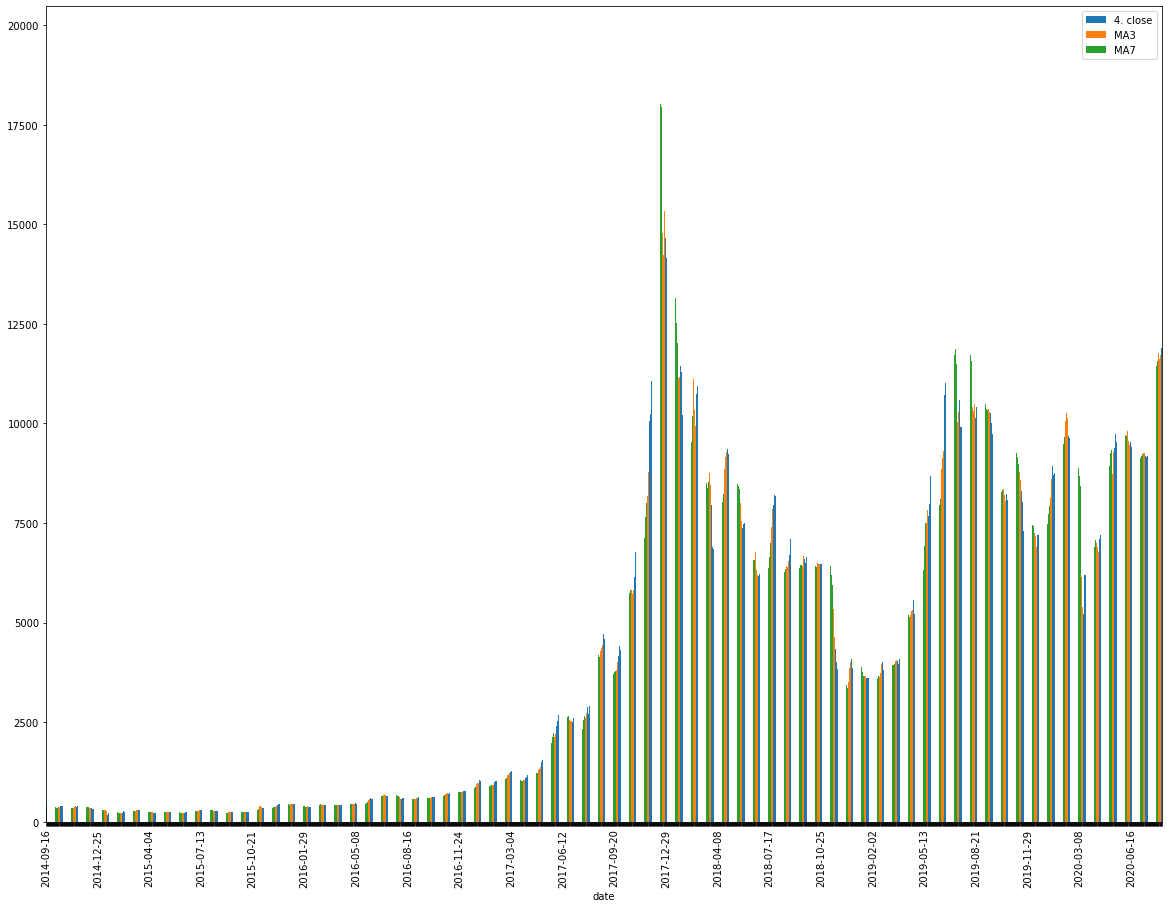

In [131]:
ax=df.plot(x='date', y=[CLOSING_PRICE_COLUMN, MEAN_AVERAGE_3_DAYS, MEAN_AVERAGE_7_DAYS],
        kind="bar",figsize=(20,15))
ax=ax.set_xticklabels([t if not i%100 else "" for i,t in enumerate(ax.get_xticklabels())])
plt.show(ax)

In [118]:
#export data to csv for visualization in a BI tool
df.to_csv('dataframe.csv')

**Interactive Chart**

In [ ]:
!pip install plotly==4.9.0
!pip install "notebook>=5.3" "ipywidgets>=7.2"

In [140]:
pd.options.plotting.backend = "plotly"
df.plot(x='date', y=[CLOSING_PRICE_COLUMN, MEAN_AVERAGE_3_DAYS, MEAN_AVERAGE_7_DAYS])

In [151]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Line(x=df['date'], y=df[CLOSING_PRICE_COLUMN],
    name="Closing Price"),
    row=1, col=1
)

fig.add_trace(
    go.Line(x=df['date'], y=df[MEAN_AVERAGE_3_DAYS],
    name="3 days Mean Average"),
    row=2, col=1
)
fig.add_trace(
    go.Line(x=df['date'], y=df[MEAN_AVERAGE_7_DAYS],
    name="7 days Mean Average"),
    row=3, col=1
)


fig.update_layout(height=600, width=800, title_text="Separate Interactive Charts")
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


